***
# <font color=blue>UNSUPERVISED LEARNING</font>
# <font color=blue>Practice with K-means</font>
# <font color=blue>(lecturer version)</font>
<div style="text-align: right"><font color=magenta>Andrea De Simone</font></div>
***

In [1]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from sklearn import datasets
from sklearn.cluster import KMeans

***
# 1.  2-D Clustering

## 1.1 Load Dataset 1

In [2]:
# Load data
X = np.loadtxt('dataset1.csv', delimiter=',')
print(X.shape)

(300, 2)


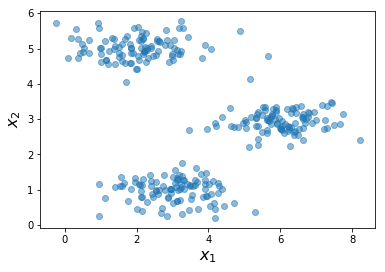

In [3]:
fig, ax = plt.subplots()
ax.set_xlabel('$x_1$',size=16)
ax.set_ylabel('$x_2$',size=16)

ax.scatter(X[:,0], X[:,1], alpha=0.5)
plt.show() 

## 1.2 Plot data and initial centroids

In [4]:
initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])

In [5]:
def scatter_plot(data, centroids):
    fig, ax = plt.subplots()
    ax.set_xlabel('$x_1$',size=16)
    ax.set_ylabel('$x_2$',size=16)

    ax.scatter(data[:,0], data[:,1], alpha=0.5)
    ax.scatter(centroids[:,0], centroids[:,1], alpha=1, c='r',marker='x',s=100)
    plt.show() 

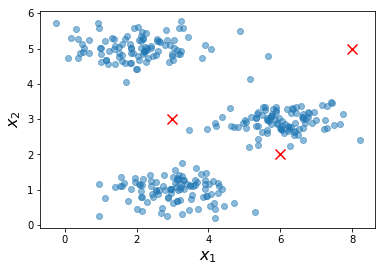

In [6]:
scatter_plot(X,initial_centroids)

## 1.3 Assign points to clusters

### <font color='magenta'>>>> Q1: Assign points to clusters. What is the cluster assignment of the 150th point? </font>

In [33]:
def cluster_assignment(X, centroids):  
    """
    Assign points of X to cluster of the closest centroid.
    """
    
    N = X.shape[0]
    tags = np.zeros(N)

    # loop over dataset
    for i in range(N):
        
        dist = np.sum(np.square( X[i,:] - centroids ), axis=1)
        #print(dist)
        # Stard Edit 
        c = np.argmin(dist)
        tags[i] = c            
        # End Edit
    return(tags)

In [34]:
tags = cluster_assignment(X, initial_centroids)  
print(tags[104])

1.0


## 1.4 Update centroids

In [9]:
def move_centroids(X, tags, k):  
    """
    Update centroid positions.
    Centroids are simple avg of intra-cluster distances
    """
    D = X.shape[1]
    centroids = np.zeros((k, D))

    # loop over centroids
    for i in range(k):
        
        # cluster partitions (list)
        indices = np.where(tags == i)
        # points in cluster
        N_points = len(indices[0])
        
        # update centroid    
        if N_points != 0:
            centroids[i,:] = ( np.sum(X[indices,:], axis=1) / N_points ).ravel()
            
    return(centroids)

In [10]:
centroids = move_centroids(X,tags,3)
centroids

array([[ 2.42830111,  3.15792418],
       [ 5.81350331,  2.63365645],
       [ 7.11938687,  3.6166844 ]])

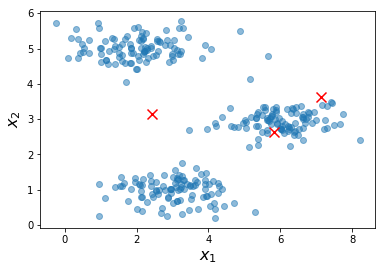

In [11]:
scatter_plot(X, centroids)

## 1.5 K-means algorithm

In [12]:
def run_k_means(X, initial_centroids):  
    """
    Run K-means algorithm. 
    Stop when centroid positions are stable (within tolerance).
    Return cluster assignments and centroid positions.
    """
    N = X.shape[0]
    k = initial_centroids.shape[0]

    tags = np.zeros(N)
    centroids = initial_centroids
    
    tolerance = 1e-5
    iteration = 0

    # Loop until centroid positions are stable
    while True:
        
        iteration += 1        
        centroids_prev = centroids
        
        # Assign points to clusters
        tags = cluster_assignment(X, centroids)
        
        # Update centroid positions
        centroids = move_centroids(X, tags, k)
        
        # check distance between current and previous centroid positions
        dist = np.sum(np.square( centroids_prev - centroids ))        
        if dist < tolerance:            
            print("Converged after {:d} iterations".format(iteration))
            break
            
        # avoid infinite loop
        if iteration >= 10000:
            break

    return(tags, centroids)

In [13]:
tags, centroids = run_k_means(X, initial_centroids)  

Converged after 7 iterations


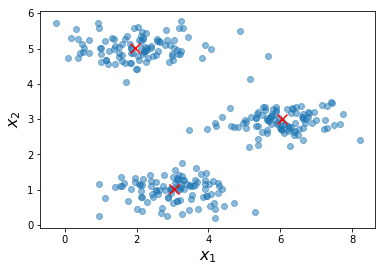

In [14]:
scatter_plot(X, centroids)

### <font color='magenta'>>>> Q2: Group coordinates of points in each cluster</font>

In [15]:
# Start Edit
cluster1 = X[tags == 0,:]   # coordinates of points tagged in first cluster 
cluster2 = X[tags == 1,:]   # coordinates of points tagged in second cluster 
cluster3 = X[tags == 2,:]   # coordinates of points tagged in third cluster 
# End Edit

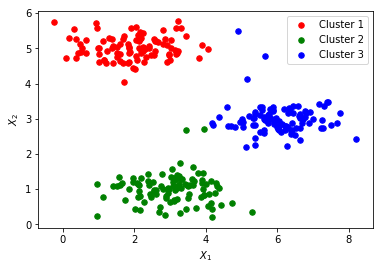

In [16]:
# Plot colored clusters
fig, ax = plt.subplots()  
ax.scatter(cluster1[:,0], cluster1[:,1], s=30, color='r', label='Cluster 1')  
ax.scatter(cluster2[:,0], cluster2[:,1], s=30, color='g', label='Cluster 2')  
ax.scatter(cluster3[:,0], cluster3[:,1], s=30, color='b', label='Cluster 3')  
leg = ax.legend(frameon=True, loc='upper right')  
ax.set_xlabel('$X_1$')  
ax.set_ylabel('$X_2$')  
plt.show()

## 1.6 Random initialization of centroids

### <font color='magenta'>>>> Q3: Complete the function 'initialize_centroids'. Run K-means with random initialization and find centroid coordinates. </font>

In [17]:
def initialize_centroids(X, k): 
    """ 
    Random Initialization of k centroids.
    Choose k random points among the data points.
    """
    
    N, D = X.shape
    centroids = np.zeros((k, D))
    
    # Start Edit
    tags = np.random.randint(0, N, k)

    for i in range(k):
        centroids[i,:] = X[tags[i],:]

    # End Edit
    
    return(centroids)

In [18]:
# random 3-D array filled with integers between 0 and 299
np.random.randint(0, 300, 3) 

array([188,  27, 270])

In [19]:
initialize_centroids(X, 3)  

array([[ 5.87177181,  3.2551773 ],
       [ 3.15273081,  0.98155871],
       [ 6.92721968,  3.19960026]])

In [20]:
tags, centroids = run_k_means(X, initialize_centroids(X, 3))
print(centroids)
%time

Converged after 8 iterations
[[ 1.95399466  5.02557006]
 [ 6.03366736  3.00052511]
 [ 3.04367119  1.01541041]]
CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 5.25 µs


In [21]:
# Compare with SKlearn KMeans
km = KMeans(n_clusters=3, init='random')
km.fit(X)
print(km.cluster_centers_)
%time

[[ 6.03366736  3.00052511]
 [ 3.04367119  1.01541041]
 [ 1.95399466  5.02557006]]
CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.2 µs


## 1.7  Choose K

In [22]:
# Loss function
def Loss(X, tags, centroids):  
    """
    Sum of intra-cluster squared distances
    """
    k = centroids.shape[0]
    loss = 0
    
    for j in range(k):
        cluster_points = X[tags == j]
        centroid = centroids[j]
        loss += np.sum(np.square( cluster_points - centroid ))
        
    return( loss )

In [23]:
Loss(X, tags, centroids)

266.65851965491936

### <font color='magenta'>>>> Q4: compute loss function for K = 1 to 10 (values in 'K_list'). Fill list 'Loss_list' with the values of the loss function.</font>

In [24]:
Loss_list = list()
K_list = range(1,11)

for K in K_list:
    
    tags, centroids = run_k_means(X, initialize_centroids(X, K) )  
    
    Loss_list.append(Loss(X,tags,centroids))


Converged after 2 iterations
Converged after 3 iterations
Converged after 3 iterations
Converged after 6 iterations
Converged after 11 iterations
Converged after 11 iterations
Converged after 6 iterations
Converged after 14 iterations
Converged after 10 iterations
Converged after 12 iterations


In [25]:
def Plot_Loss_K(Loss_list,K_list):
    
    fig, ax = plt.subplots()
    ax.plot(K_list,Loss_list, marker="o")
    ax.tick_params(labelsize=12)
    ax.set_xticks(K_list)
    ax.set_xlabel("K", fontsize=14)
    ax.set_ylabel("Loss",fontsize=14)
    plt.show()

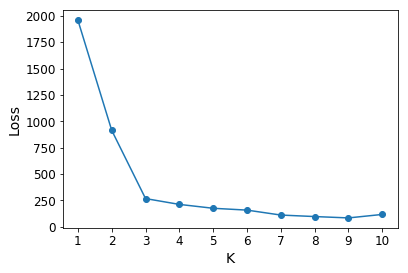

In [26]:
Plot_Loss_K(Loss_list,K_list)

***
# 2. IRIS dataset

## 2.1 Load IRIS Dataset

In [27]:
iris = datasets.load_iris()
X_iris = iris.data
Y_iris = iris.target

In [28]:
# set number of clusters
K=3

# run the algorithm
tags, centroids = run_k_means(X_iris, initialize_centroids(X_iris, K))

Converged after 3 iterations


In [29]:
cluster1 = X_iris[tags == 0,:]  
cluster2 = X_iris[tags == 1,:]  
cluster3 = X_iris[tags == 2,:]  

true1 = X_iris[Y_iris == 0,:]  
true2 = X_iris[Y_iris == 1,:]  
true3 = X_iris[Y_iris == 2,:]  

print(cluster1.shape)
print(cluster2.shape)
print(cluster3.shape)
print("")
print(true1.shape)
print(true2.shape)
print(true3.shape)

(39, 4)
(61, 4)
(50, 4)

(50, 4)
(50, 4)
(50, 4)


In [30]:
def plot_predicted_vs_true(cluster1,cluster2,cluster3, true1, true2, true3):
    
    # Plot clusters
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2,figsize=(12,10))  

    ax1.set_title("Predicted")
    ax1.scatter(cluster1[:,0], cluster1[:,1], s=30, color='b',label='cluster 1')  
    ax1.scatter(cluster2[:,0], cluster2[:,1], s=30, color='r', label='cluster 2')  
    ax1.scatter(cluster3[:,0], cluster3[:,1], s=30, color='g', label='cluster 3')  
    ax1.legend(frameon=True, loc='lower right')  
    ax1.set_xlabel('sepal length [cm]')  
    ax1.set_ylabel('sepal width [cm]')  

    ax2.set_title("True")
    ax2.scatter(true1[:,0], true1[:,1], s=30, color='orange', label='setosa')  
    ax2.scatter(true2[:,0], true2[:,1], s=30, color='purple', label='versicolor')  
    ax2.scatter(true3[:,0], true3[:,1], s=30, color='pink', label='virginica')  
    ax2.legend(frameon=True, loc='lower right')  
    ax2.set_xlabel('sepal length [cm]')  
    ax2.set_ylabel('sepal width [cm]')  

    ax3.set_title("Predicted")
    ax3.scatter(cluster1[:,2], cluster1[:,3], s=30, color='b',label='cluster 1')  
    ax3.scatter(cluster2[:,2], cluster2[:,3], s=30, color='r', label='cluster 2')  
    ax3.scatter(cluster3[:,2], cluster3[:,3], s=30, color='g', label='cluster 3')  
    ax3.legend(frameon=True, loc='lower right')  
    ax3.set_xlabel('petal length [cm]')  
    ax3.set_ylabel('petal width [cm]')  

    ax4.set_title("True")
    ax4.scatter(true1[:,2], true1[:,3], s=30, color='orange', label='setosa')  
    ax4.scatter(true2[:,2], true2[:,3], s=30, color='purple', label='versicolor')  
    ax4.scatter(true3[:,2], true3[:,3], s=30, color='pink', label='virginica')  
    ax4.legend(frameon=True, loc='lower right')  
    ax4.set_xlabel('petal length [cm]')  
    ax4.set_ylabel('petal width [cm]') 

    plt.show()

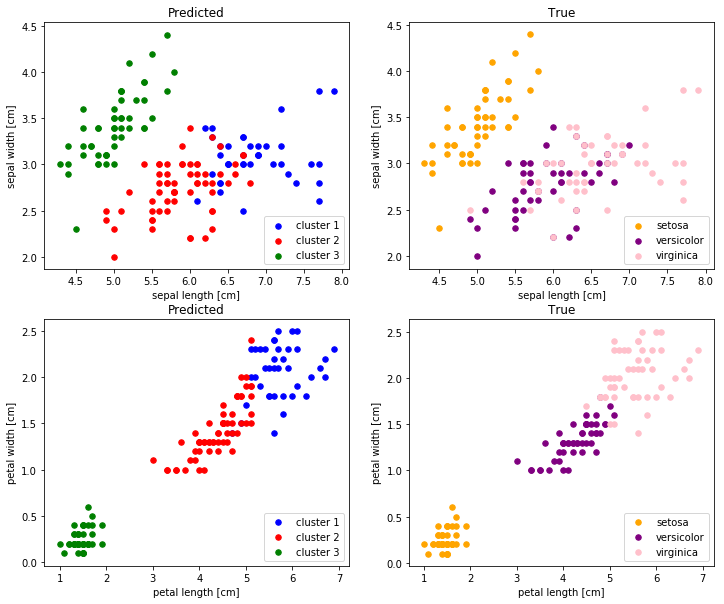

In [31]:
plot_predicted_vs_true(cluster1,cluster2,cluster3,true1,true2,true3)

## 2.2 Assign Clusters to Classes

In [32]:
true_centroids = np.zeros((3, 4))  # 3 clusters, 4 features

for i in range(3):
    true_centroids[i] = np.mean(X_iris[Y_iris==i],axis=0)
    
print(true_centroids)
print("")
print(centroids)

[[ 5.006  3.418  1.464  0.244]
 [ 5.936  2.77   4.26   1.326]
 [ 6.588  2.974  5.552  2.026]]

[[ 6.85384615  3.07692308  5.71538462  2.05384615]
 [ 5.88360656  2.74098361  4.38852459  1.43442623]
 [ 5.006       3.418       1.464       0.244     ]]


In [33]:
print(np.sum(np.square(centroids[0]-true_centroids), axis=1))
print(np.sum(np.square(centroids[1]-true_centroids), axis=1))
print(np.sum(np.square(centroids[2]-true_centroids), axis=1))

[ 24.88068312   3.58454774   0.10873728]
[ 11.19850315   0.03186184   2.25410132]
[  0.        10.273144  22.587128]


### <font color='magenta'>>>> Q5: Assign clusters to true classes. </font>

In [34]:
tags_new = np.copy(tags)

# assign clusters to classes
for i in range(K):
    
    # Start Edit
    c = np.argmin(np.sum(np.square(centroids[i]-true_centroids), axis=1))
    tags_new[tags == i] = c
    # End Edit

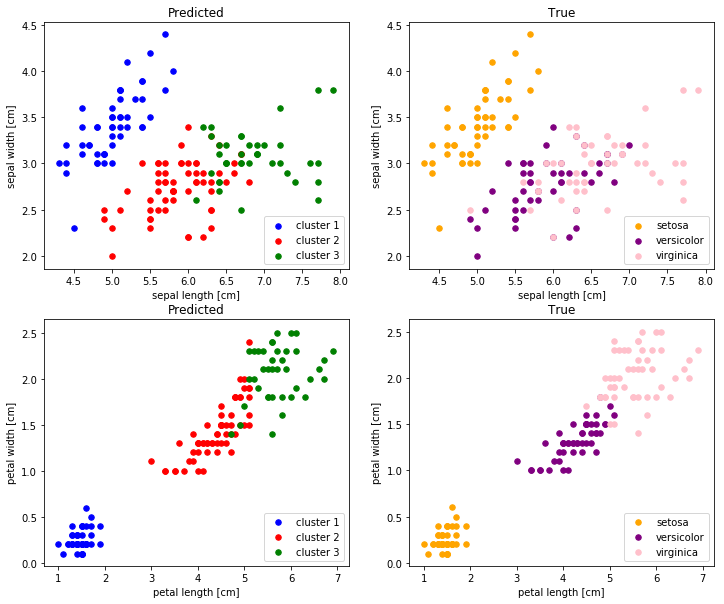

In [35]:
cluster1 = X_iris[tags_new == 0,:]  
cluster2 = X_iris[tags_new == 1,:]  
cluster3 = X_iris[tags_new == 2,:]  

true1 = X_iris[Y_iris == 0,:]  
true2 = X_iris[Y_iris == 1,:]  
true3 = X_iris[Y_iris == 2,:]  

plot_predicted_vs_true(cluster1,cluster2,cluster3,true1,true2,true3)

## 2.3 Evaluate Performance

### <font color='magenta'>>>> Q6: find fraction of points correctly assigned to true clusters </font>

In [41]:
correct = 0 
tot = Y_iris.shape[0]

for i in range(3):
    
    # Start Edit
    correct += np.sum(np.logical_and(tags_new == i, Y_iris == i))
    # End Edit
    
print("Correct assignments = {:.1f}%".format(correct/tot * 100))

Correct assignments = 88.7%


***
# 3. Image compression (bonus, no questions)

<img src="parrot.jpg", height="150" width="200">

## 3.1 Load Dataset 'Parrot'

In [42]:
A = np.loadtxt('dataset_parrot.csv', delimiter=',').reshape((150,200,3))
print(A[:3])
print(X.shape)
# RGB values

[[[ 103.  165.  114.]
  [  99.  161.  110.]
  [  93.  155.  106.]
  ..., 
  [  44.  108.   14.]
  [  62.  124.   47.]
  [  83.  145.   78.]]

 [[  83.  143.   91.]
  [  94.  154.  103.]
  [ 101.  160.  112.]
  ..., 
  [  54.  116.   30.]
  [  69.  132.   61.]
  [  81.  145.   84.]]

 [[  68.  122.   72.]
  [  70.  124.   74.]
  [  75.  129.   80.]
  ..., 
  [  69.  131.   54.]
  [  83.  148.   84.]
  [  89.  152.   97.]]]
(300, 2)


In [43]:
# normalize value ranges
A_norm = A / 255.

# reshape the array
X_p = np.reshape(A_norm, (A_norm.shape[0] * A_norm.shape[1], A_norm.shape[2]))

print(A_norm.shape)
print(X_p.shape)

(150, 200, 3)
(30000, 3)


## 3.2 Reconstruct image from centroids

Converged after 39 iterations


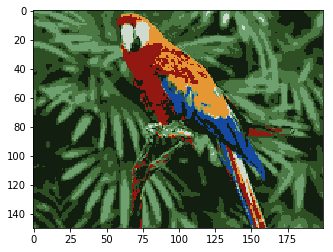

In [44]:
# Set number of colors
Ncolors = 8

# randomly initialize the centroids
initial_centroids = initialize_centroids(X_p, Ncolors)

# run the algorithm
tags, centroids = run_k_means(X_p, initial_centroids)

# map each pixel to the centroid value
X_recovered = centroids[tags.astype(int),:]

# reshape to the original dimensions
X_recovered = np.reshape(X_recovered, (A_norm.shape[0], A_norm.shape[1], A_norm.shape[2]))

plt.imshow(X_recovered) 
plt.show()